Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Load the dataset

In [2]:
df = pd.read_csv('/content/train.csv')

Perform EDA

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


perform preprocessing

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
X = df.drop([ 'Churn'], axis=1)
y = df['Churn'].replace({'Yes': 1, 'No': 0})

In [10]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [11]:
X['gender']=LabelEncoder().fit_transform(X['gender'])
X['Partner']=LabelEncoder().fit_transform(X['Partner'])
X['Dependents']=LabelEncoder().fit_transform(X['Dependents'])
X['PhoneService']=LabelEncoder().fit_transform(X['PhoneService'])
X['MultipleLines']=LabelEncoder().fit_transform(X['MultipleLines'])
X['InternetService']=LabelEncoder().fit_transform(X['InternetService'])
X['OnlineSecurity']=LabelEncoder().fit_transform(X['OnlineSecurity'])
X['OnlineBackup']=LabelEncoder().fit_transform(X['OnlineBackup'])
X['DeviceProtection']=LabelEncoder().fit_transform(X['DeviceProtection'])
X['StreamingTV']=LabelEncoder().fit_transform(X['StreamingTV'])
X['StreamingMovies']=LabelEncoder().fit_transform(X['StreamingMovies'])
X['Contract']=LabelEncoder().fit_transform(X['Contract'])
X['PaperlessBilling']=LabelEncoder().fit_transform(X['PaperlessBilling'])
X['PaymentMethod']=LabelEncoder().fit_transform(X['PaymentMethod'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])

In [12]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [13]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [14]:
X['MonthlyCharges'] = X['MonthlyCharges'].astype('int')

In [15]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
median = X['TotalCharges'].median()
X['TotalCharges'].fillna(median,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


visualize the data

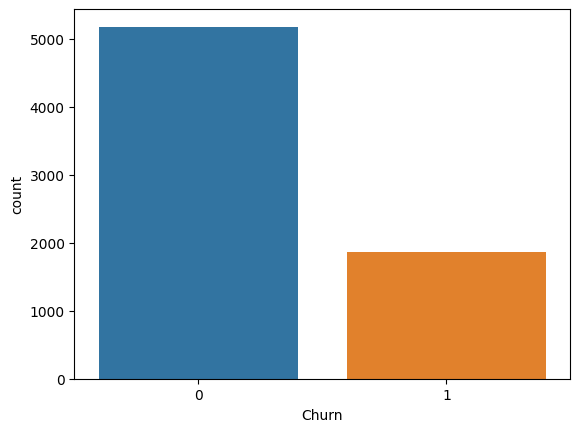

In [17]:
sns.countplot(x='Churn', data=df)
plt.show()

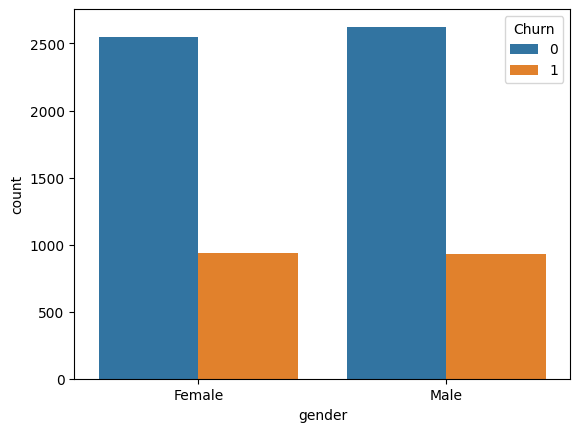

In [18]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

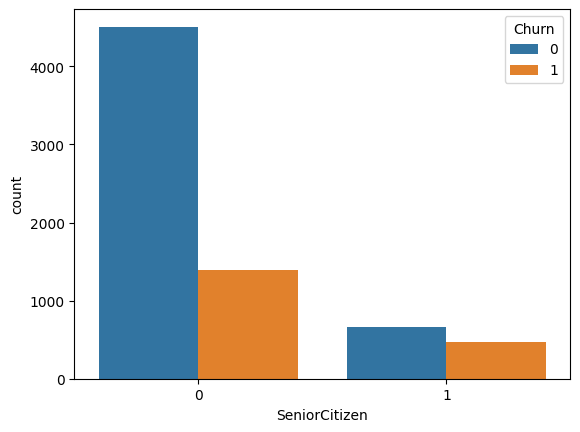

In [19]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

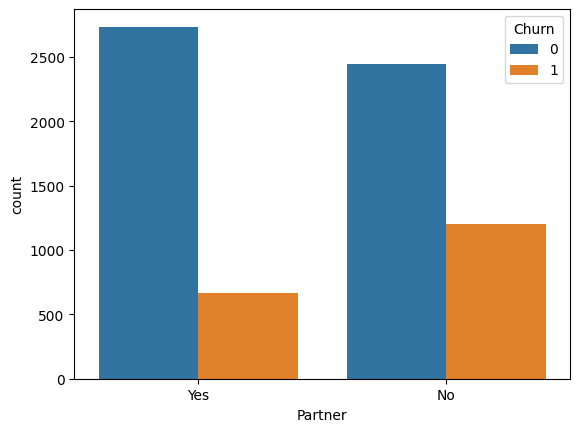

In [20]:
sns.countplot(x='Partner', hue='Churn', data=df)
plt.show()

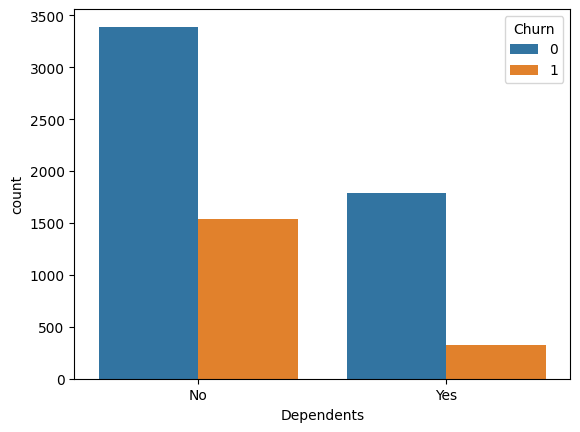

In [21]:
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

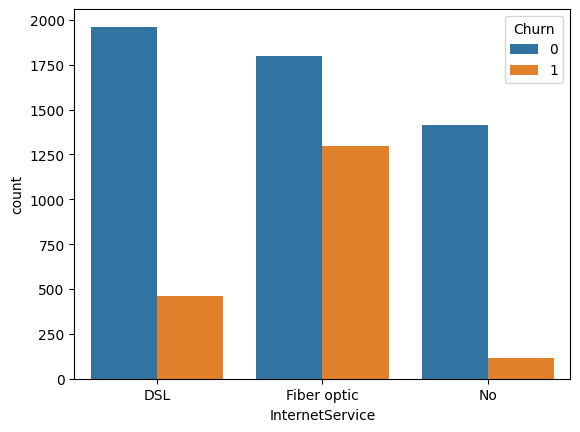

In [22]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

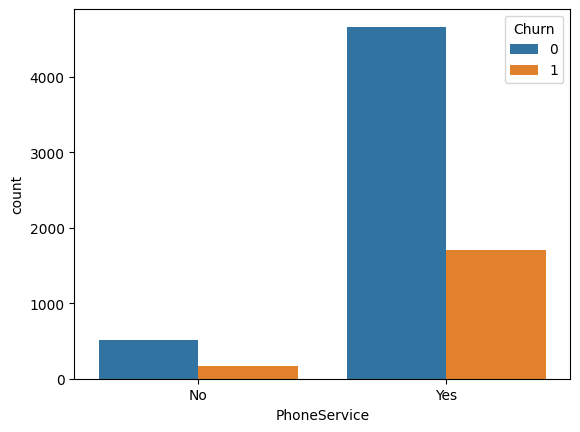

In [23]:
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.show()

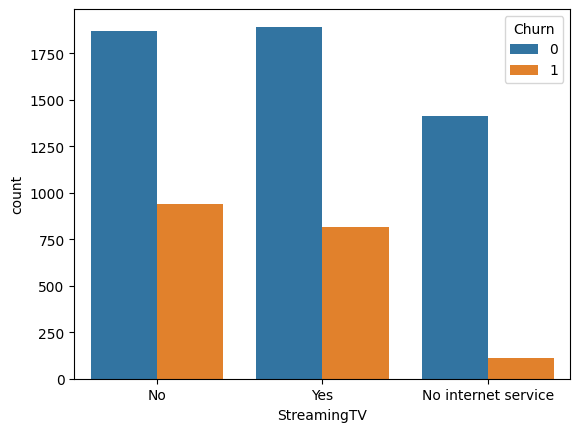

In [24]:
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.show()

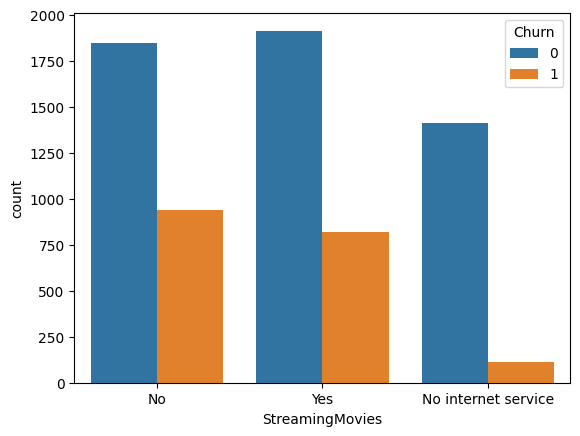

In [25]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.show()

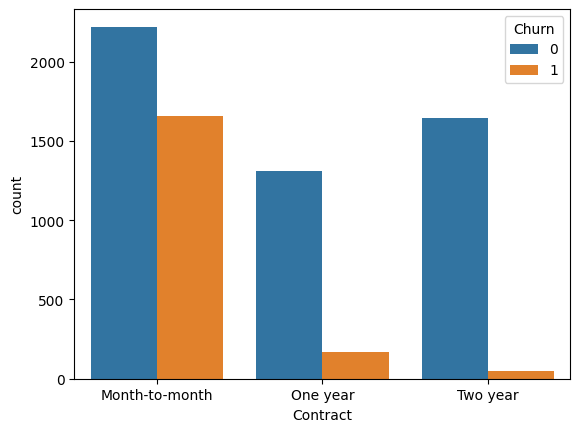

In [26]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

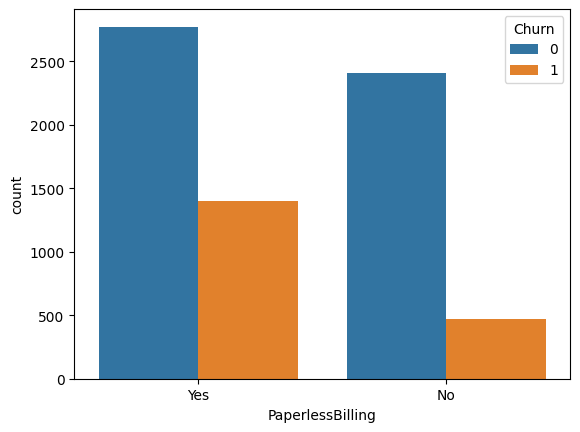

In [27]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.show()

<ipython-input-28-8a81f9e1494f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


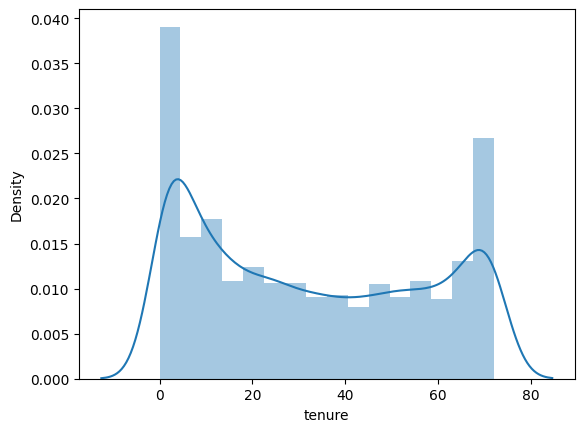

In [28]:
sns.distplot(df['tenure'])
plt.show()

<ipython-input-29-65cf2824d61a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])


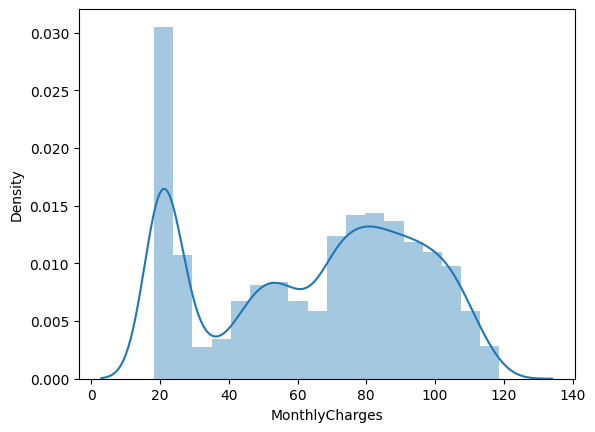

In [29]:
sns.distplot(df['MonthlyCharges'])
plt.show()

<ipython-input-30-28d04b32ce35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'].dropna())


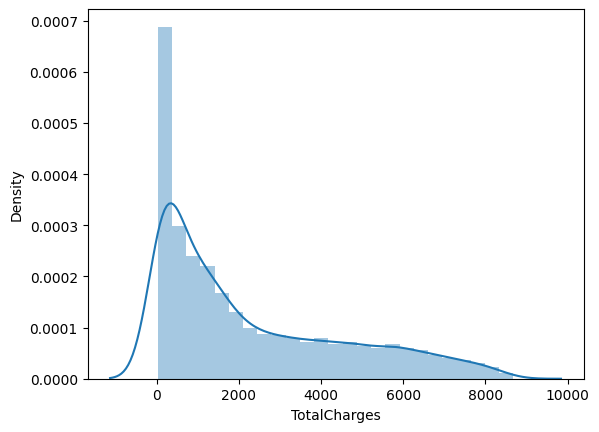

In [30]:
sns.distplot(df['TotalCharges'].dropna())
plt.show()

# Perform outliers detection and imputation

In [31]:
q1, q3 = np.percentile(df['TotalCharges'].dropna(), [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df[(df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [32]:
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df['TotalCharges'].values.reshape(-1, 1))

#preprocess the dataset

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#Train the model

In [36]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [37]:
#print the model performance
print('Logistic Regression:')
print('Accuracy:', lr_accuracy)
print('Precision:', lr_precision)
print('Recall:', lr_recall)

Logistic Regression:
Accuracy: 0.815471965933286
Precision: 0.677115987460815
Recall: 0.579088471849866


In [38]:
# decesion tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)

In [39]:
#print the model performance
print('Decision Tree:')
print('Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)

Decision Tree:
Accuracy: 0.794889992902768
Precision: 0.6071428571428571
Recall: 0.6380697050938338


#save the model and scaler
we choose logistic as its accuracy is better compared to decesion tree


In [44]:
import pickle

In [45]:
filename='model.sav'

In [46]:
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [47]:
pickled_model = pickle.load(open('lr_model.pkl','rb'))